<a href="https://colab.research.google.com/github/bathicodes/Augmentic/blob/main/KNN_Experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [68]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [70]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

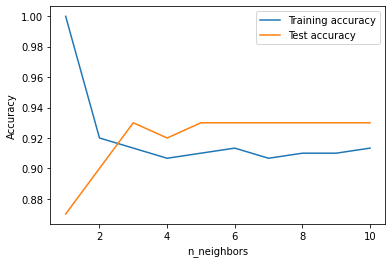

In [71]:
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings:
  clf = KNeighborsClassifier(n_neighbors=n_neighbors)
  clf.fit(X_train, y_train)
  training_accuracy.append(clf.score(X_train, y_train))
  test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="Training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="Test accuracy")
plt.xlabel("n_neighbors")
plt.ylabel("Accuracy")
plt.legend()

In [72]:
knn = KNeighborsClassifier(n_neighbors=10, metric="minkowski", p=2)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [73]:
y_pred = knn.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_test.reshape(len(y_test),1),y_pred.reshape(len(y_pred),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]]


In [74]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)

ac = accuracy_score(y_test, y_pred)
print(ac)

[[64  4]
 [ 3 29]]
0.93


In [75]:
from sklearn.model_selection import cross_val_score

accurcies = cross_val_score(estimator=knn, X=X_train, y=y_train, cv=10)
print("Accuracy: {:.2f} %".format(accurcies.mean()*100))
print("Standard diviation: {:.2f} %".format(accurcies.std()*100))

Accuracy: 90.33 %
Standard diviation: 6.23 %


# Experiment with Iris by using KNN

In [76]:
from sklearn.datasets import load_iris

dataset = load_iris()

In [77]:
X_train, X_test, y_train, y_test = train_test_split(dataset['data'],dataset['target'],random_state=0)

In [78]:
X_train.shape, y_train.shape

((112, 4), (112,))

In [79]:
X_test.shape, y_test.shape

((38, 4), (38,))

In [80]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

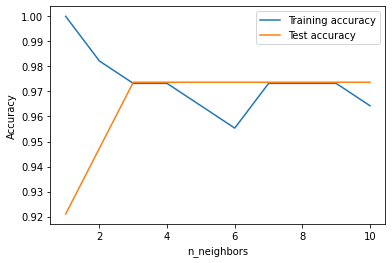

In [81]:
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings:
  clf = KNeighborsClassifier(n_neighbors=n_neighbors)
  clf.fit(X_train, y_train)
  training_accuracy.append(clf.score(X_train, y_train))
  test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="Training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="Test accuracy")
plt.xlabel("n_neighbors")
plt.ylabel("Accuracy")
plt.legend()

In [82]:
iknn = KNeighborsClassifier(n_neighbors=3, metric="minkowski", p=2)
iknn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [83]:
y_pred = iknn.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)

ac = accuracy_score(y_test, y_pred)
print(ac)

print(f"Training accuracy: {iknn.score(X_train, y_train)}")
print(f"Test accuracy: {iknn.score(X_test, y_test)}")

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
0.9736842105263158
Training accuracy: 0.9732142857142857
Test accuracy: 0.9736842105263158


In [84]:
from sklearn.model_selection import cross_val_score

accurcies = cross_val_score(estimator=iknn, X=X_train, y=y_train, cv=10)
print("Accuracy: {:.2f} %".format(accurcies.mean()*100))
print("Standard diviation: {:.2f} %".format(accurcies.std()*100))

Accuracy: 94.62 %
Standard diviation: 8.30 %
